In [103]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model as lm 

In [2]:
rsei = pd.read_csv(r"v234_aggregated_micro_gc14_2014.csv.gz",compression='gzip', header = None)

In [3]:
rsei.columns = ['X','Y','NumberOfFacilites','NumberOfReleases','NumberOfChemicals','ToxConc','Score','Pop','ScoreCancer','ScoreNonCancer']

In [79]:
year14 = pd.DataFrame(rsei)

In [80]:
year14

,X,Y,NumberOfFacilites,NumberOfReleases,NumberOfChemicals,ToxConc,Score,Pop,ScoreCancer,ScoreNonCancer
0,1754,311,1,4,3,0.012557,0.0,0.0,0.0,0.0
1,1755,311,1,4,3,0.013327,0.0,0.0,0.0,0.0
2,1756,311,1,4,3,0.013929,0.0,0.0,0.0,0.0
3,1757,311,1,4,3,0.014508,0.0,0.0,0.0,0.0
4,1758,311,1,4,3,0.014810,0.0,0.0,0.0,0.0
5,1759,311,1,4,3,0.014769,0.0,0.0,0.0,0.0
6,1760,311,1,4,3,0.014781,0.0,0.0,0.0,0.0
7,1761,311,1,4,3,0.015422,0.0,0.0,0.0,0.0
8,1762,311,1,4,3,0.016132,0.0,0.0,0.0,0.0
9,1763,311,1,4,3,0.016975,0.0,0.0,0.0,0.0


In [82]:
new= year14.sort_values(by= ['Score'], ascending =False)

In [86]:
new= new[:10000]

In [90]:
new[['X','Y']]= new[['X','Y']].apply(pd.to_numeric)

In [92]:
facility[['X','Y']]= facility[['X','Y']].apply(pd.to_numeric)

In [117]:
new.to_csv('new_datatype1.csv', sep = ',')

In [119]:
facility.to_csv('fac_datatype1.csv', sep = ',')

In [115]:
facility['Y'].dtypes

dtype('float64')

In [113]:
new[['X','Y']] = new[['X','Y']].astype(np.float64)

In [116]:
new['Y'].dtypes

dtype('float64')

In [109]:
nrow(facility[facility.X == 2112])

NameError: name 'nrow' is not defined

In [87]:
new.to_csv('newaggregated.csv', sep = ',')

In [74]:
facility.to_csv('fac.csv', sep = ',')

In [72]:
facility = pd.read_csv(r"facility.csv - Copy.gz", compression = 'gzip', encoding = "ISO-8859-1")

C:\Users\saini\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22,28,30,44,50,51,52,56,58,67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [75]:
offside = pd.read_csv(r"offsite.csv.gz", compression = 'gzip', encoding = "ISO-8859-1")

C:\Users\saini\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [77]:
offside.to_csv('off.csv', sep = ',')

In [70]:
year14.to_csv('out.csv', sep=',')

In [15]:
mod=lm.LinearRegression()
X=year14[['X','Y','NumberOfFacilites','NumberOfReleases','NumberOfChemicals','ToxConc','Pop','ScoreCancer','ScoreNonCancer']]
X.dropna()
y=year14['Score']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [18]:
mod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
a= mod.score(X,y)

In [20]:
a

0.99944554668648633

In [24]:
mod1=lm.LinearRegression()
X=year14[['X','Y','NumberOfFacilites','NumberOfReleases','NumberOfChemicals','ToxConc','Pop']]
X.dropna()
y=year14['Score']

In [30]:
mod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
a1= mod.score(X,y)

In [33]:
a1

-0.017160637855963667

In [34]:
mod=lm.LinearRegression()
X=year14[['NumberOfFacilites','NumberOfReleases','NumberOfChemicals','ToxConc','Pop','ScoreCancer','ScoreNonCancer']]
X.dropna()
y=year14['Score']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [38]:
mod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
a2 = mod.score(X,y)

In [41]:
a2

0.99944576722431655

In [54]:
mod=lm.LinearRegression()
X=year14[['X','Y','NumberOfFacilites','NumberOfReleases','NumberOfChemicals','ToxConc']]
X.dropna()
y=year14['Score']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [56]:
mod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
a3 = mod.score(X,y)

In [58]:
a3

0.052212239910287901

In [65]:
mod_log=lm.LogisticRegression()
X=year14[['NumberOfFacilites','NumberOfReleases','NumberOfChemicals','ToxConc','Pop']]
X.dropna()
y=year14['Score']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [67]:
mod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
a4 = mod.score(X,y)

In [69]:
a4

-0.16683450550387469

In [16]:
filename = r"C:\Users\saini\Nick Mulvey (pushking)\temp1.h5"
year14.to_hdf(filename, 'data', mode='w', format='table')

In [20]:
store = pd.HDFstore(filename)

AttributeError: module 'pandas' has no attribute 'HDFstore'

In [70]:
consensus = pd.read_csv(r"census_block2010_con_us_810m.csv.gz", compression = 'gzip')

In [72]:
consensus

,GridID,X,Y,BlockID00,UR,PCT_B_C,PCT_C_B,PCT_CP_B
0,14,-2126,1523,40270111071059,Z,0.006029,0.000754,0.000000
1,14,-2125,1523,40270111071059,Z,0.993539,0.124338,0.000000
2,14,-2125,1522,40270111072002,Z,0.431253,0.219350,0.000000
3,14,-2125,1523,40270111072002,Z,0.441065,0.224341,0.000000
4,14,-2124,1522,40270111072002,Z,0.002394,0.001218,0.000000
5,14,-2124,1523,40270111072002,Z,0.125468,0.063817,0.000000
6,14,-2126,1521,40270111072045,Z,0.904457,0.002799,0.000000
7,14,-2125,1521,40270111072045,Z,0.097513,0.000302,0.000000
8,14,-2105,1548,40270121001437,Z,0.933855,0.017462,0.000000
9,14,-2104,1548,40270121001437,Z,0.065085,0.001217,0.000000


In [46]:
# print(year14.loc[year14['ScoreCancer'] > '0.0'])

xyz = pd.DataFrame((year14[(year14['ScoreCancer']>0)]))




KeyboardInterrupt: 

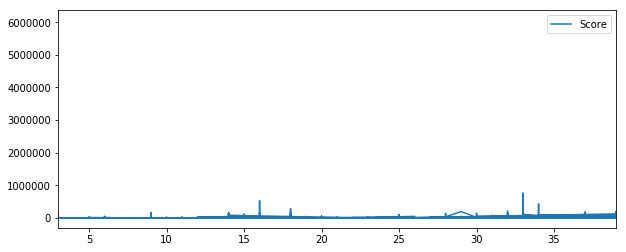

In [60]:
xyz.plot(x='NumberOfChemicals',y='Score',figsize=(10,4))

C:\Users\saini\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=14.0, right=14.0
  'left=%s, right=%s') % (left, right))


KeyboardInterrupt: 

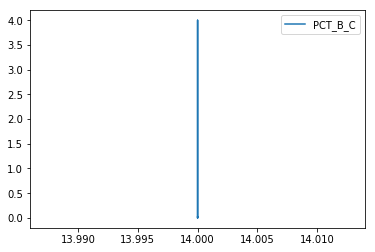

In [62]:
grouped_by = year14.groupby(['NumberOfFacilites']).mean().reset_index()

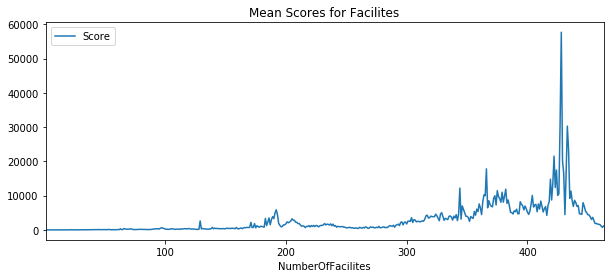

In [66]:
grouped_by.plot(x='NumberOfFacilites',y='Score',figsize=(10,4),title='Mean Scores for Facilites')

In [67]:
grouped_by.sort_values('Score',ascending=False)

,NumberOfFacilites,X,Y,NumberOfReleases,NumberOfChemicals,ToxConc,Score,Pop,ScoreCancer,ScoreNonCancer
427,428,824.583333,2612.027778,2277.750000,129.500000,65813.733056,57661.298758,1593.242164,57411.592323,381.368979
426,427,829.000000,2614.916667,2291.541667,132.208333,31005.225000,30927.924070,2567.267115,30402.421262,646.049931
432,433,830.636364,2609.696970,2364.696970,137.666667,34552.735455,30273.832582,2342.915597,29655.026845,722.048948
433,434,827.815789,2607.763158,2371.315789,136.315789,32255.275000,23557.004971,1825.006119,23216.414863,469.133034
421,422,826.548387,2613.935484,2241.709677,128.161290,24507.957742,21528.461642,1996.466003,21256.829597,343.224188
428,429,828.258065,2610.032258,2332.032258,134.870968,32354.816774,20224.164558,1731.950323,19967.593010,310.863426
365,366,371.928571,1599.079365,3517.666667,188.015873,85144.065714,17817.616802,1020.065554,16904.972928,396.339746
423,424,824.500000,2613.875000,2222.750000,125.281250,21954.732188,17455.663016,1864.473028,17212.715203,295.706804
431,432,829.756757,2614.351351,2327.081081,133.675676,29638.098378,16605.811673,1628.655841,16277.211841,385.683005
429,430,827.333333,2612.722222,2307.777778,132.722222,29098.121667,16465.179856,1592.750600,16125.629472,368.843361


In [69]:
xyz[xyz.NumberOfFacilites == 427].sort_values('Score',ascending=False)

,X,Y,NumberOfFacilites,NumberOfReleases,NumberOfChemicals,ToxConc,Score,Pop,ScoreCancer,ScoreNonCancer
6368857,844,2613,427,2381,142,79030.40,123564.00000,6603.23000,121221.0000,2920.270000
6453276,837,2632,427,2293,138,58434.10,105802.00000,7595.08000,105036.0000,1066.800000
6444276,840,2630,427,2375,142,72469.80,105390.00000,6248.00000,104412.0000,1187.700000
6373247,844,2614,427,2381,142,66392.90,105273.00000,6555.48000,102976.0000,2661.300000
6364453,844,2612,427,2381,142,85748.90,104600.00000,5150.50000,102756.0000,2394.770000
6377640,844,2615,427,2362,142,56320.40,98302.40000,7136.09000,95787.0000,2692.640000
6342342,844,2607,427,2384,143,49630.00,27418.40000,2378.61000,26867.2000,720.468000
6462279,835,2634,427,2326,133,19994.70,15320.10000,3469.70000,15086.6000,315.844000
6475753,834,2637,427,2339,133,15065.30,11662.50000,3519.01000,11459.7000,306.375000
6457769,825,2633,427,2285,132,17994.50,7903.58000,1976.91000,7793.3000,223.399000


In [73]:
consensus[(consensus.X == 44) & (consensus.Y == 2613)]

,GridID,X,Y,BlockID00,UR,PCT_B_C,PCT_C_B,PCT_CP_B
11685063,14,44,2613,190470703001110,Z,0.15561,1.0,0.999958
